In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def get_ellipse_params(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Otsu thresholding to binarize the image
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    # Find the contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    max_area = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > max_area:
            max_area = area
            max_cnt = cnt

    # Fit an ellipse to the apple contour
    ellipse = cv2.fitEllipse(max_cnt)

    # Extract the major and minor axes from the ellipse
    major_axis = max(ellipse[1])
    minor_axis = min(ellipse[1])

    # Calculate the perimeter of the ellipse
    perimeter = cv2.arcLength(max_cnt, True)

    # Calculate the eccentricity of the ellipse
    a = max(major_axis, minor_axis) / 2
    b = min(major_axis, minor_axis) / 2
    eccentricity = np.sqrt(1 - (b/a)**2)
    blank = np.zeros_like(thresh)
    cv2.ellipse(blank, ellipse, 255, -1)
    area = cv2.countNonZero(blank)
    
    center, axes, _ = ellipse
    center = tuple(map(int, center))
    a, b = map(int, axes)
    
    dists = []
    for point in max_cnt:
        dist = cv2.pointPolygonTest(max_cnt, center, True)
        dists.append(dist)

    # Draw the ellipse and radial lines on the original image
    for dist, point in zip(dists, max_cnt):
        point = tuple(point[0])
        cv2.line(gray, center, point, (0, 0, 255), 1)
    cv2.ellipse(gray, ellipse, (0, 255, 0), 20)
    plt.imshow(gray,'gray')
    return perimeter, eccentricity, area, major_axis, minor_axis,dists


31.834410742163655
0.39328436657297944
46.95257629817651
8.694593330568097
6.877555451178633
3.7503389846785846


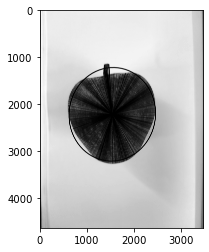

In [2]:
perimeter, eccentricity,area,major_axis,minor_axis,dists = get_ellipse_params(r'C:\Users\MANAV MAHENDRU\Downloads\apple_side.jpg')
print(perimeter*0.0045)
print(eccentricity)
print(area*12*22/(4624*3468))
a=major_axis*12/3468
b=minor_axis*22/4624
if(a<b):
   a,b=b,a
print(a)
print(b)
print(dists[0]*0.0045)


In [3]:
70.92*8.69

616.2948